In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [2]:

data = sio.loadmat('EBAY_20141125.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

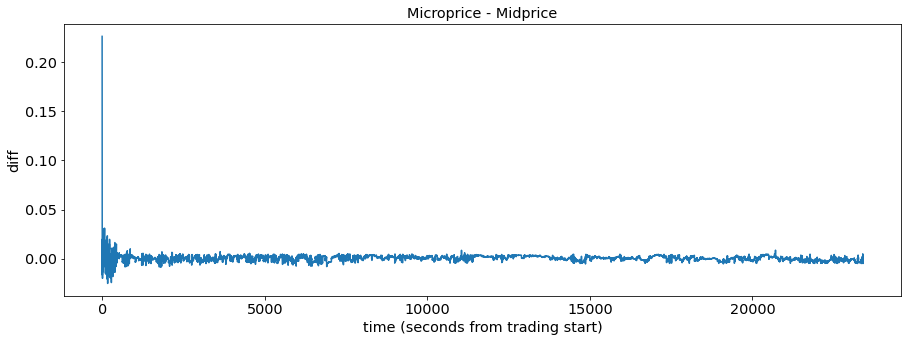

In [5]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

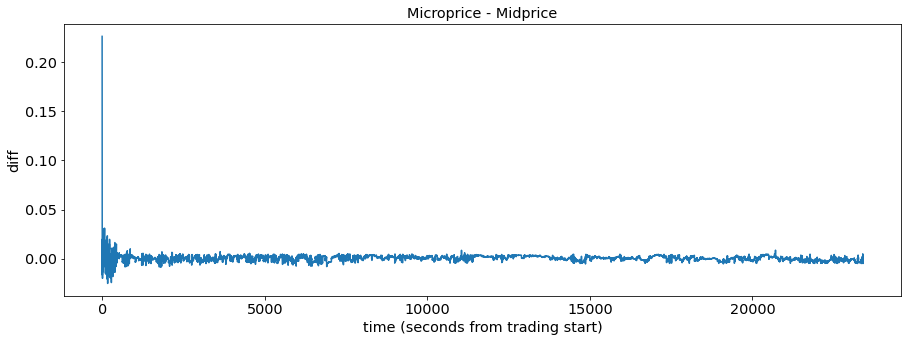

In [6]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [7]:
type(midprice)

numpy.ndarray

In [8]:
import pandas as pd

In [9]:
midprice = pd.DataFrame(midprice)

In [10]:
midprice.describe()

,0
count,234000.000000
mean,54.489852
std,0.045233
min,54.290000
25%,54.485000
50%,54.495000
75%,54.505000
max,54.685000


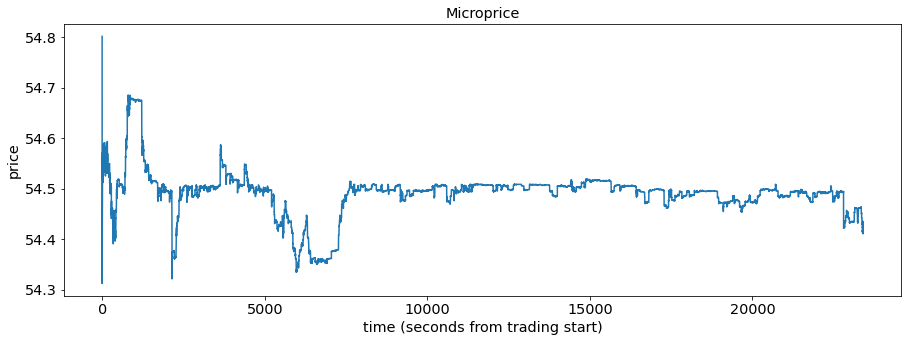

In [11]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [12]:
microprice = pd.DataFrame(microprice)

In [13]:
microprice.describe()

,0
count,234000.000000
mean,54.490257
std,0.045711
min,54.312316
25%,54.484665
50%,54.496367
75%,54.505998
max,54.801448


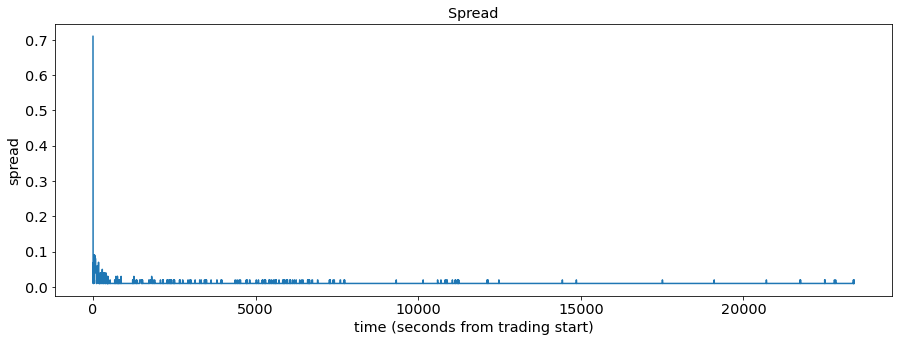

In [14]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [15]:
spread = pd.DataFrame(spread)

In [16]:
spread.describe()

,0
count,234000.000000
mean,0.010638
std,0.005186
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.710000


In [17]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

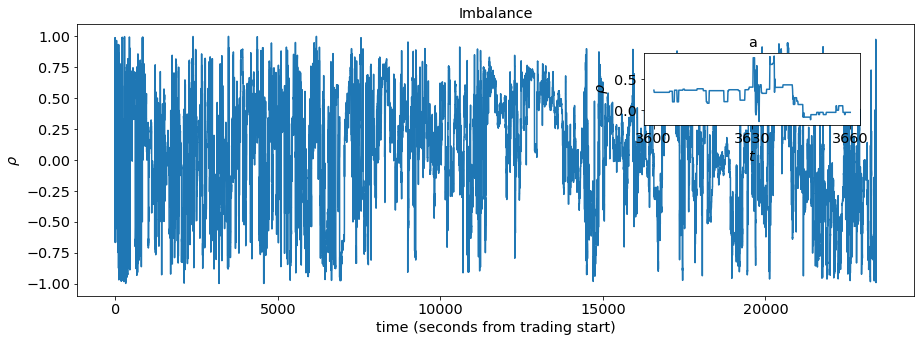

In [18]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

In [19]:
imbalance = (t, rho)

In [20]:
imbalance = pd.DataFrame(imbalance)

In [21]:
imbalance.describe()

,0,1,2,3,4,5,6,7,8,9,...,233990,233991,233992,233993,233994,233995,233996,233997,233998,233999
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,23399.1,23399.2,23399.3,23399.4,23399.5,23399.6,23399.7,23399.8,23399.9,23400.0
freq,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# parameters
S0 = 100
N = 10 ** 6 #Initial number of stocks
T = 1; 
k = 1e-2;
b = 1e-2
M = 1000;    #Number of trading times
alpha = 0.1; 
phi = 0.01;
sigma = 0.30;

In [46]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [47]:
tt = np.linspace(0, 1, M + 1)

In [48]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

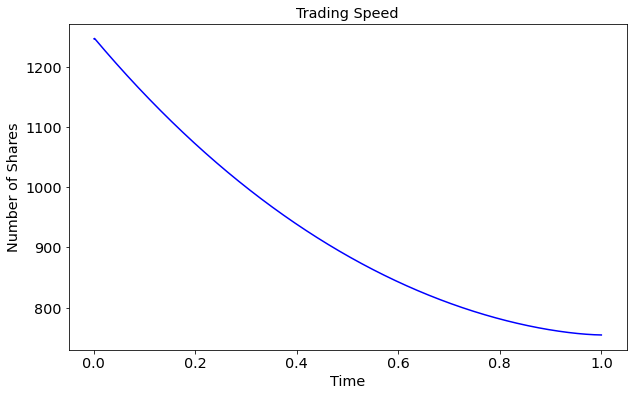

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

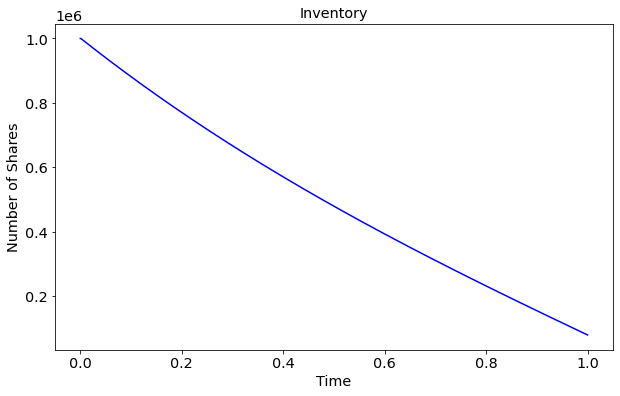

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

In [51]:
q[-1]

array([79441.36448125])

In [52]:
S = np.zeros((R + 1, 1))
S[0] = S0 
rn = np.random.standard_normal(S.shape) 
for t in range(1, R + 1): 
    S[t] = S[t-1] - b * v[t] * T/R + sigma * np.sqrt(T/R) * rn[t]

Text(0.5, 1.0, 'Stock Price')

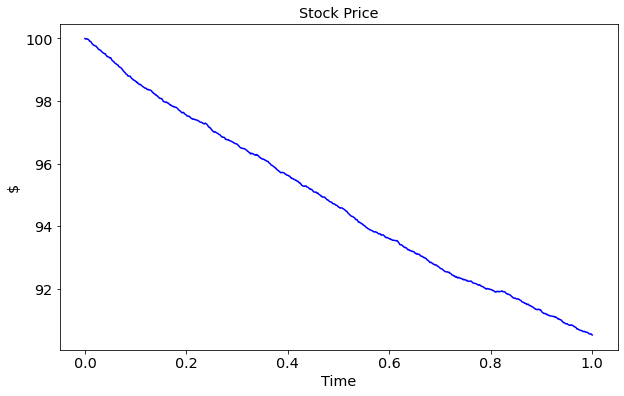

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

In [55]:
R = np.zeros((M + 1, 1))
R[0] = 0
for t in range(1, M + 1): 
    R[t] = R[t-1] +  (S[t] - k * v[t]) * v[t]

Text(0.5, 1.0, 'Revenue')

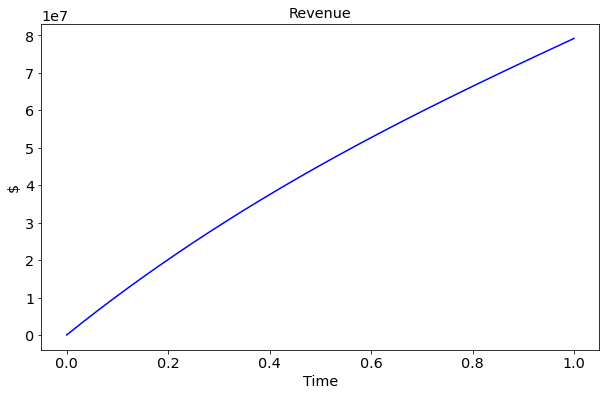

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(tt, R, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Revenue')